In [1]:
import os.path as pth
import pickle as pkl

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
vis_key_to_cls = {                                                         
    'entire_cls0': 'ET',
    'entire_cls0_neg': 'ET',
    'entire_cls1': 'TC',
    'entire_cls1_neg': 'TC',
    'entire_cls2': 'WT',                                                 
    'entire_cls2_neg': 'WT',
}

In [110]:
import eval
import layers_list

afile = 'data/models/unet_resize2/full_vis_comparison_with_rankcorr_try2/analysis.pkl'
with open(afile, 'rb') as f:
    analysis = pkl.load(f)

In [111]:
unet_layers = dict(layers_list.unet_layers)
vis_keys = list(eval.vis_key_name_mapping.keys())
layer_keys = list(unet_layers.keys())
all_keys = [(vis_key, layer_key) for vis_key in vis_keys
                                 for layer_key in layer_keys]

In [169]:
examples = []
for ex in analysis['examples']:
    vis_key = ex['vis_key']
    layer_key = ex['layer_key']
    vis_name = eval.vis_key_name_mapping[vis_key]                                
    layer_name = unet_layers[layer_key]
    if 'vis_background_iou' not in ex:
        ex['vis_background_iou'] = None
    if 'vis_background_corr' not in ex:
        ex['vis_background_corr'] = None
    vis_entry = {
        'id': ex['id'],
        'neg': 'Neg' in vis_name,
        'target_cls': vis_key_to_cls[vis_key],
        'vis_name': vis_name,
        'layer_name': layer_name,
        'vltname': vis_name + ' ' + layer_name,
    }
    vis_entry['vlname'] = (vis_name + ' ' + layer_name).replace(vis_entry['target_cls'] + ' ', '')

    
    
    iou_entry = dict(vis_entry)
    examples.append(iou_entry)
    iou_entry['metric'] = 'iou'
    if ex.get('vis_gt_iou') is not None:
        iou_entry['vis_background_iou'] = ex['vis_background_iou'][0, 0, 0]
        iou_entry['vis_background_rank_corr'] = ex['vis_background_corr'][0, 0, 0, 0]
        iou_entry['vis_background_rank_corr_pval'] = ex['vis_background_corr'][0, 0, 1, 0]

        # border iou
        iou_entry['vis_gt_border_WT_iou'] = ex['vis_gt_border_iou'][0, 2, 0]
        iou_entry['baseline_0.0_gt_border_WT_iou'] = ex['vis_gt_border_iou'][0, 2, 1]
        iou_entry['baseline_bkg_gt_border_WT_iou'] = ex['vis_gt_border_iou'][0, 2, 4]
        
        # border rank corr
        iou_entry['vis_gt_border_WT_rank_corr'] = ex['vis_gt_border_corr'][0, 2, 0, 0]
        iou_entry['vis_gt_border_WT_rank_corr_pval'] = ex['vis_gt_border_corr'][0, 2, 1, 0]
        iou_entry['baseline_bkg_gt_border_WT_rank_corr'] = ex['vis_gt_border_corr'][0, 2, 0, 1]
        iou_entry['baseline_bkg_gt_border_WT_rank_corr_pval'] = ex['vis_gt_border_corr'][0, 2, 1, 1]

        # gt iou
        iou_entry['vis_gt_WT_iou'] = ex['vis_gt_iou'][0, 2, 0]
        iou_entry['baseline_0.0_gt_WT_iou'] = ex['vis_gt_iou'][0, 2, 1]
        iou_entry['baseline_bkg_gt_WT_iou'] = ex['vis_gt_iou'][0, 2, 4]

        # gt rank corr
        iou_entry['vis_gt_WT_rank_corr'] = ex['vis_gt_corr'][0, 2, 0, 0]
        iou_entry['vis_gt_WT_rank_corr_pval'] = ex['vis_gt_corr'][0, 2, 1, 0]
        iou_entry['baseline_bkg_gt_WT_rank_corr'] = ex['vis_gt_corr'][0, 2, 0, 1]
        iou_entry['baseline_bkg_gt_WT_rank_corr_pval'] = ex['vis_gt_corr'][0, 2, 1, 1]

        # model's segmentation performance
        iou_entry['pred_ET_iou'] = ex['pred_iou'][0, 0, 0]
        iou_entry['pred_TC_iou'] = ex['pred_iou'][0, 1, 0]
        iou_entry['pred_WT_iou'] = ex['pred_iou'][0, 2, 0]


    #         'vis_TC': ex['vis_gt_iou'][0, 1] if ex['vis_gt_iou'] is not None else None,
    #         'vis_WT': ex['vis_gt_iou'][0, 2] if ex['vis_gt_iou'] is not None else None,
    #         'vis_l1': ex['vis_gt_iou'][0, 3] if ex['vis_gt_iou'] is not None else None,
    #         'vis_l2': ex['vis_gt_iou'][0, 4] if ex['vis_gt_iou'] is not None else None,
    #         'vis_border_ET': ex['vis_gt_border_iou'][0, 0] if ex['vis_gt_border_iou'] is not None else None,
    #         'vis_border_TC': ex['vis_gt_border_iou'][0, 1] if ex['vis_gt_border_iou'] is not None else None,
    #         'vis_border_WT': ex['vis_gt_border_iou'][0, 2] if ex['vis_gt_border_iou'] is not None else None,
    #         'vis_border_l1': ex['vis_gt_border_iou'][0, 3] if ex['vis_gt_border_iou'] is not None else None,
    #         'vis_border_l2': ex['vis_gt_border_iou'][0, 4] if ex['vis_gt_border_iou'] is not None else None,
    #         'vis_background': ex['vis_background_iou'] if ex['vis_background_iou'] is not None else None,
    #         'pred_ET': ex['pred_iou'][0, 0],
    #         'pred_TC': ex['pred_iou'][0, 1],
    #         'pred_WT': ex['pred_iou'][0, 2],
    #     })
    #     examples.append({
    #         'id': ex['id'],
    #         'neg': 'Neg' in vis_name,
    #         'target_cls': vis_key_to_cls[vis_key],
    #         'vis_name': vis_name,
    #         'layer_name': layer_name,
    #         'vlname': vis_name + ' ' + layer_name,
    #         'metric': 'corr',
    #         'vis_ET': ex['vis_gt_corr'][0, 0] if ex['vis_gt_corr'] is not None else None,
    #         'vis_TC': ex['vis_gt_corr'][0, 1] if ex['vis_gt_corr'] is not None else None,
    #         'vis_WT': ex['vis_gt_corr'][0, 2] if ex['vis_gt_corr'] is not None else None,
    #         'vis_l1': ex['vis_gt_corr'][0, 3] if ex['vis_gt_corr'] is not None else None,
    #         'vis_l2': ex['vis_gt_corr'][0, 4] if ex['vis_gt_corr'] is not None else None,
    #         'vis_border_ET': ex['vis_gt_border_corr'][0, 0, 0] if ex['vis_gt_border_corr'] is not None else None,
    #         'vis_border_TC': ex['vis_gt_border_corr'][0, 1, 0] if ex['vis_gt_border_corr'] is not None else None,
    #         'vis_border_WT': ex['vis_gt_border_corr'][0, 2, 0] if ex['vis_gt_border_corr'] is not None else None,
    #         'vis_border_l1': ex['vis_gt_border_corr'][0, 3, 0] if ex['vis_gt_border_corr'] is not None else None,
    #         'vis_border_l2': ex['vis_gt_border_corr'][0, 4, 0] if ex['vis_gt_border_corr'] is not None else None,
    #         'vis_background': ex['vis_background_corr'] if ex['vis_background_corr'] is not None else None,
    #         'pred_ET': ex['pred_corr'][0, 0],
    #         'pred_TC': ex['pred_corr'][0, 1],
    #         'pred_WT': ex['pred_corr'][0, 2],
    #     })

df = pd.DataFrame(examples)

df = df[np.logical_not(df.layer_name.str.contains('[high,low]', regex=False))]
un_df = df
#df = df[df.target_cls == 'WT']


In [113]:
import scipy.stats as stats

In [114]:
def add_ttest(var1, var2, name):
    def f_(_df):
        tstat = stats.ttest_ind(_df[var1], _df[var2], equal_var=False, nan_policy='propagate')
        _df[name] = tstat[0]
        _df[name + '_pval'] = tstat[1]
        return pd.DataFrame([{'tstat': tstat[0], 'pval': tstat[1]}])
    return f_

In [115]:
aggregators = [np.mean]

In [116]:
cm = sns.light_palette("green", as_cmap=True)


# Overview

Goal: Pick some visualizations

Approach: Characterize visualizations by similarity to
* background
* ground truth
* ground truth border
* each other

Conclusion (7 choices):

* `GradCAM l1/l2/l3/lr high res`, because they don't highlight the background

* `Neg GradCAM l2 low res` / `Neg GradCAM l3 final` because they sort of look like ground truth border

* `GradCAM l1 final` because it looks like ground truth


# Measurements

Metrics:
* IOU (Intersection over Union)
   * location
   * confidence
* Rank correlation (Spearman)


But these absolutes are hard to interpret... so

Baselines:
* Uniform heatmap (0, 0.5, or 1.0)
* Background heatmap


Compare mean (over examples) IOU/rank correlation with that of baselines using t-test (Welch's)

Visualizations
* layers (16 choices)
* GradCAM type (regular, Neg)
* target (ET, TC, WT)

# Does it highlight the background?

### Mostly no, but

these are more background-like:
* Neg GradCAM high res
* Neg GradCAM l1 final

these are less background-like:
* GradCAM high res

### ^ These are the cases where metrics are most extreme, AND where variance across examples is relatively small

(Where std is smaller than mean IOU or both are 0)

### Also, rank correlation seems reasonable from p-val perspective.

(Most rank corr p-vals are small, especially for those highlighted ^)

### This suggests GradCAM high res is good to use because it consistently highlights non-background regions. 

### Probably don't use the ones that are more background-like. Maybe they act sort of like a CLS token??

In [333]:
sort_col = ('vis_background_rank_corr', 'mean')
cols = ['vis_background_iou', 'vis_background_rank_corr', 'vis_background_rank_corr_pval']
aggregators = [np.mean]

In [335]:
_df = df
_df = _df.groupby('vlname')
_df = _df.aggregate(aggregators)
_df = _df.sort_values(sort_col)[cols] #, 'vis_background_rank_corr_pval']]
_df.style.background_gradient(cmap=cm)

,vis_background_iou,vis_background_rank_corr,vis_background_rank_corr_pval
,mean,mean,mean
vlname,,,
GradCAM l1 high res,0.001293,-0.707684,0.000000
GradCAM l2 high res,0.008231,-0.622665,0.000000
GradCAM l3 high res,0.004531,-0.609542,0.000000
GradCAM l4 high res,0.019352,-0.516080,0.000000
GradCAM l4 low res,0.008228,-0.490526,0.000000
GradCAM l3 final,0.072815,-0.189072,0.000000
GradCAM l2 low res,0.072815,-0.189072,0.000000
GradCAM l1 final,0.000000,-0.165409,0.000000


In [334]:
_df = df
_df = _df.groupby('vlname')
_df = _df.aggregate([np.mean, np.std])
_df = _df.sort_values(sort_col)[cols] #, 'vis_background_rank_corr_pval']]
_df.style.background_gradient(cmap=cm)

In [336]:
_df = df
_df = _df.groupby('layer_name')
_df = _df.aggregate(aggregators)
_df = _df.sort_values(sort_col)[cols] #, 'vis_background_rank_corr_pval']]
_df.style.background_gradient(cmap=cm)

,vis_background_iou,vis_background_rank_corr,vis_background_rank_corr_pval
,mean,mean,mean
layer_name,,,
l1 high res,0.023411,-0.334647,0.000000
l2 high res,0.026456,-0.251284,0.000203
l3 high res,0.048801,-0.241764,0.000000
l4 high res,0.081110,-0.188300,0.000038
l4 low res,0.099333,-0.170097,0.000000
l3 final,0.039298,-0.162167,0.005835
l2 low res,0.039298,-0.162167,0.005835
l3 low res,0.066192,-0.093674,0.004993


In [337]:
_df = df
_df = _df.groupby('vis_name')
_df = _df.aggregate(aggregators)
_df = _df.sort_values(sort_col)[cols] #, 'vis_background_rank_corr_pval']]
_df.style.background_gradient(cmap=cm)

,vis_background_iou,vis_background_rank_corr,vis_background_rank_corr_pval
,mean,mean,mean
vis_name,,,
WT GradCAM,0.031672,-0.318106,0.000001
WT Neg GradCAM,0.076252,0.014414,0.004099


In [338]:
_df = df
_df = _df.groupby('vlname')
_df = _df.aggregate(aggregators)
_df = _df.sort_values(sort_col)[cols]
_df.style.background_gradient(cmap=cm)

,vis_background_iou,vis_background_rank_corr,vis_background_rank_corr_pval
,mean,mean,mean
vlname,,,
GradCAM l1 high res,0.001293,-0.707684,0.000000
GradCAM l2 high res,0.008231,-0.622665,0.000000
GradCAM l3 high res,0.004531,-0.609542,0.000000
GradCAM l4 high res,0.019352,-0.516080,0.000000
GradCAM l4 low res,0.008228,-0.490526,0.000000
GradCAM l3 final,0.072815,-0.189072,0.000000
GradCAM l2 low res,0.072815,-0.189072,0.000000
GradCAM l1 final,0.000000,-0.165409,0.000000


# Border highlighting

### Do some visualizations tend to highlight the border?

A little: `Neg GradCAM l2 low res` and `Neg GradCAM l3 final` to some degree.

Also `GradCAM l1 final` specifically, which highlights the ground truth.

(See first table below.)

In [339]:
sort_col = ('vis_gt_border_WT_iou', 'mean')
cols = ['vis_gt_border_WT_iou', 'vis_gt_border_WT_rank_corr', 'vis_gt_border_WT_rank_corr_pval', 'baseline_bkg_gt_border_WT_rank_corr'] #, 'vis_background_rank_corr', 'vis_background_rank_corr_pval']
aggregators = [np.mean]

In [340]:
_df = df
_df = _df.groupby('vlname')
_df = _df.aggregate(aggregators)
_df = _df.sort_values(sort_col)[cols] #, 'vis_background_rank_corr_pval']]
_df.style.background_gradient(cmap=cm)

,vis_gt_border_WT_iou,vis_gt_border_WT_rank_corr,vis_gt_border_WT_rank_corr_pval,baseline_bkg_gt_border_WT_rank_corr
,mean,mean,mean,mean
vlname,,,,
Neg GradCAM l2 final,0.001565,-0.055828,0.012671,-0.113960
Neg GradCAM l1 low res,0.001565,-0.055828,0.012671,-0.113960
Neg GradCAM l1 final,0.003408,-0.137266,0.000000,-0.113960
GradCAM l1 final,0.004502,0.111708,0.011366,-0.113960
GradCAM l4 final,0.004928,-0.056788,0.005217,-0.113960
GradCAM l3 low res,0.004928,-0.056788,0.005217,-0.113960
GradCAM l3 final,0.005238,-0.066708,0.003747,-0.113960
GradCAM l2 low res,0.005238,-0.066708,0.003748,-0.113960


In [342]:
_df = df
_df = _df.groupby('layer_name')
_df = _df.aggregate(aggregators)
_df = _df.sort_values(sort_col)[cols] #, 'vis_background_rank_corr_pval']]
_df.style.background_gradient(cmap=cm)

,vis_gt_border_WT_iou,vis_gt_border_WT_rank_corr,vis_gt_border_WT_rank_corr_pval,baseline_bkg_gt_border_WT_rank_corr
,mean,mean,mean,mean
layer_name,,,,
l1 final,0.003955,-0.012779,0.005683,-0.113960
l1 low res,0.008369,0.010076,0.006336,-0.113960
l2 final,0.008369,0.010076,0.006336,-0.113960
l1 high res,0.014680,0.052578,0.005557,-0.113960
l2 high res,0.018479,0.049699,0.010004,-0.113960
l4 low res,0.019187,0.056907,0.004535,-0.113960
l3 high res,0.019208,0.058746,0.006675,-0.113960
l4 high res,0.020160,0.049453,0.010702,-0.113960


In [343]:
_df = df
_df = _df.groupby('vis_name')
_df = _df.aggregate(aggregators)
_df = _df.sort_values(sort_col)[cols] #, 'vis_background_rank_corr_pval']]
_df.style.background_gradient(cmap=cm)

,vis_gt_border_WT_iou,vis_gt_border_WT_rank_corr,vis_gt_border_WT_rank_corr_pval,baseline_bkg_gt_border_WT_rank_corr
,mean,mean,mean,mean
vis_name,,,,
WT GradCAM,0.014952,0.045146,0.002691,-0.113960
WT Neg GradCAM,0.020397,0.026392,0.008103,-0.113960


In [344]:
_df = df
_df = _df.groupby('neg')
_df = _df.aggregate(aggregators)
_df = _df.sort_values(sort_col)[cols] #, 'vis_background_rank_corr_pval']]
_df.style.background_gradient(cmap=cm)

,vis_gt_border_WT_iou,vis_gt_border_WT_rank_corr,vis_gt_border_WT_rank_corr_pval,baseline_bkg_gt_border_WT_rank_corr
,mean,mean,mean,mean
neg,,,,
False,0.014952,0.045146,0.002691,-0.113960
True,0.020397,0.026392,0.008103,-0.113960


### Do visualizations highlight border more than the background does?

Yes, absolutely

In [345]:
_df = df
_df = _df.groupby('vlname')
_df = _df.apply(add_ttest('vis_gt_border_WT_iou', 'baseline_bkg_gt_border_WT_iou', 't_vis_bkg_border_WT_iou'))
_df = _df.sort_values('pval')
_df.style.background_gradient(cmap=cm)

,,tstat,pval
vlname,,,
Neg GradCAM l3 final,0,21.183145,0.000000
Neg GradCAM l2 low res,0,21.183145,0.000000
GradCAM l1 high res,0,20.557181,0.000000
Neg GradCAM l1 final,0,20.349032,0.000000
GradCAM l1 low res,0,18.674722,0.000000
GradCAM l2 final,0,18.674721,0.000000
GradCAM l2 high res,0,18.266758,0.000000
GradCAM l4 low res,0,17.016521,0.000000
GradCAM l4 high res,0,16.491052,0.000000


### Do visualizations highlight border more than a blank image?

Yes, absolutely

Especially `Neg GradCAM l2 low res` / `Neg GradCAM l3 final`

In [346]:
_df = df
_df = _df.groupby('vlname')
_df = _df.apply(add_ttest('vis_gt_border_WT_iou', 'baseline_0.0_gt_border_WT_iou', 't_vis_0.0_border_WT_iou'))
_df = _df.sort_values('pval')
_df.style.background_gradient(cmap=cm)

,,tstat,pval
vlname,,,
Neg GradCAM l3 final,0,21.195815,0.000000
Neg GradCAM l2 low res,0,21.195815,0.000000
GradCAM l1 high res,0,20.592601,0.000000
Neg GradCAM l1 final,0,20.577028,0.000000
GradCAM l1 low res,0,18.714568,0.000000
GradCAM l2 final,0,18.714567,0.000000
GradCAM l2 high res,0,18.292292,0.000000
GradCAM l4 low res,0,17.035765,0.000000
GradCAM l4 high res,0,16.508366,0.000000


# Ground truth

### Does it highlight ground truth classes?

Yes, to some degree

Mainly `GradCAM l1 final`, and also `Neg GradCAM l2 low res` / `Neg GradCAM l3 final`

In [353]:
sort_col = ('vis_gt_WT_iou', 'mean')
cols = ['vis_gt_WT_iou', 'vis_gt_WT_rank_corr', 'vis_gt_WT_rank_corr_pval', 'baseline_bkg_gt_WT_rank_corr'] #, 'vis_background_rank_corr', 'vis_background_rank_corr_pval']
aggregators = [np.mean]

In [354]:
_df = df
_df = _df.groupby('vlname')
_df = _df.aggregate(aggregators)
_df = _df.sort_values(sort_col)[cols] #, 'vis_background_rank_corr_pval']]
_df.style.background_gradient(cmap=cm)

,vis_gt_WT_iou,vis_gt_WT_rank_corr,vis_gt_WT_rank_corr_pval,baseline_bkg_gt_WT_rank_corr
,mean,mean,mean,mean
vlname,,,,
Neg GradCAM l1 final,0.000681,-0.233017,0.000000,-0.166111
Neg GradCAM l2 final,0.001388,-0.104266,0.003139,-0.166111
Neg GradCAM l1 low res,0.001388,-0.104266,0.003139,-0.166111
GradCAM l3 final,0.010374,-0.122967,0.000238,-0.166111
GradCAM l2 low res,0.010374,-0.122967,0.000238,-0.166111
GradCAM l4 final,0.015223,-0.053755,0.002537,-0.166111
GradCAM l3 low res,0.015223,-0.053755,0.002537,-0.166111
Neg GradCAM l2 high res,0.018755,-0.040646,0.012638,-0.166111


# GradCAM's target class doesn't matter much (ET vs TC vs WT for same vis/layer)

### For that reason and for simplicity, I only look at visualizations that target WT

In [355]:
un_df.groupby(['vlname', 'target_cls']).aggregate([np.mean, np.std]).style.background_gradient(cmap=cm)

# 9/2

# Are any of these metrics correlated with performance?

If the

In [26]:
metrics = ['vis_background_iou', 'vis_background_rank_corr',
       'vis_background_rank_corr_pval', 'vis_gt_border_WT_iou',
       'baseline_0.0_gt_border_WT_iou', 'baseline_bkg_gt_border_WT_iou',
       'vis_gt_border_WT_rank_corr', 'vis_gt_border_WT_rank_corr_pval',
       'baseline_bkg_gt_border_WT_rank_corr',
       'baseline_bkg_gt_border_WT_rank_corr_pval', 'vis_gt_WT_iou',
       'baseline_0.0_gt_WT_iou', 'baseline_bkg_gt_WT_iou',
       'vis_gt_WT_rank_corr', 'vis_gt_WT_rank_corr_pval',
       'baseline_bkg_gt_WT_rank_corr', 'baseline_bkg_gt_WT_rank_corr_pval']

In [20]:
un_df.groupby(['vlname', 'target_cls']).aggregate(np.mean)

neg  vis_background_iou  \
vlname                  target_cls                              
GradCAM l1 final        ET          False        3.460596e-08   
                        TC          False        4.485439e-08   
                        WT          False        8.516168e-08   
GradCAM l1 high res     ET          False        4.712500e-03   
                        TC          False        3.198582e-03   
...                                   ...                 ...   
Neg GradCAM l4 high res TC           True        1.509934e-01   
                        WT           True        1.428677e-01   
Neg GradCAM l4 low res  ET           True        1.948188e-01   
                        TC           True        1.920358e-01   
                        WT           True        1.904375e-01   

                                    vis_background_rank_corr  \
vlname                  target_cls                             
GradCAM l1 final        ET                         -0.071500   
                        TC                         -0.100779   
                        WT                         -0.165409   
GradCAM l1 high res     ET                         -0.550956   
                        TC                         -0.611532   
...                                                      ...   
Neg GradCAM l4 high res TC                          0.150025   
                        WT                          0.139480   
Neg GradCAM l4 low res  ET                          0.164444   
                        TC                          0.160605   
                        WT                          0.150332   

                                    vis_background_rank_corr_pval  \
vlname                  target_cls                                  
GradCAM l1 final        ET                           2.024225e-04   
                        TC                           1.513729e-10   
                        WT                           0.000000e+00   
GradCAM l1 high res     ET                          6.380014e-241   
                        TC                           0.000000e+00   
...                                                           ...   
Neg GradCAM l4 high res TC                           4.456559e-13   
                        WT                           7.658185e-05   
Neg GradCAM l4 low res  ET                           3.442265e-04   
                        TC                           8.380210e-30   
                        WT                           1.716694e-72   

                                    vis_gt_border_WT_iou  \
vlname                  target_cls                         
GradCAM l1 final        ET                      0.001362   
                        TC                      0.001034   
                        WT                      0.004502   
GradCAM l1 high res     ET                      0.018717   
                        TC                      0.018629   
...                                                  ...   
Neg GradCAM l4 high res TC                      0.010060   
                        WT                      0.010243   
Neg GradCAM l4 low res  ET                      0.010421   
                        TC                      0.010364   
                        WT                      0.010388   

                                    baseline_0.0_gt_border_WT_iou  \
vlname                  target_cls                                  
GradCAM l1 final        ET                           6.192103e-10   
                        TC                           6.192103e-10   
                        WT                           6.192103e-10   
GradCAM l1 high res     ET                           6.192103e-10   
                        TC                           6.192103e-10   
...                                                           ...   
Neg GradCAM l4 high res TC                           6.192103e-10   
                        WT                           6.1921

In [85]:
def corr_mat(_df):
    #print(_df.shape)
    #print(_df.corr().shape)
    return _df.corr().reset_index() #pd.DataFrame([{'corr': _df.corr()}])

In [136]:
hi = un_df.groupby(['vlname', 'target_cls']).apply(corr_mat)

In [137]:
hi

index  neg  \
vlname                 target_cls                                              
GradCAM l1 final       ET         0                                 neg  NaN   
                                  1                  vis_background_iou  NaN   
                                  2            vis_background_rank_corr  NaN   
                                  3       vis_background_rank_corr_pval  NaN   
                                  4                vis_gt_border_WT_iou  NaN   
...                                                                 ...  ...   
Neg GradCAM l4 low res WT         16       baseline_bkg_gt_WT_rank_corr  NaN   
                                  17  baseline_bkg_gt_WT_rank_corr_pval  NaN   
                                  18                        pred_ET_iou  NaN   
                                  19                        pred_TC_iou  NaN   
                                  20                        pred_WT_iou  NaN   

                                      vis_background_iou  \
vlname                 target_cls                          
GradCAM l1 final       ET         0                  NaN   
                                  1             1.000000   
                                  2             0.136889   
                                  3            -0.013141   
                                  4            -0.054772   
...                                                  ...   
Neg GradCAM l4 low res WT         16            0.001659   
                                  17                 NaN   
                                  18           -0.168667   
                                  19           -0.024739   
                                  20            0.105974   

                                      vis_background_rank_corr  \
vlname                 target_cls                                
GradCAM l1 final       ET         0                        NaN   
                                  1                   0.136889   
                                  2                   1.000000   
                                  3                   0.212374   
                                  4                  -0.096997   
...                                                        ...   
Neg GradCAM l4 low res WT         16                 -0.094464   
                                  17                       NaN   
                                  18                  0.002120   
                                  19                 -0.030127   
                                  20                  0.155270   

                                      vis_background_rank_corr_pval  \
vlname                 target_cls                                     
GradCAM l1 final       ET         0                             NaN   
                                  1                       -0.013141   
                                  2                        0.212374   
                                  3                        1.000000   
                                  4                       -0.065761   
...                                                             ...   
Neg GradCAM l4 low res WT         16                       0.013441   
                                  17                            NaN   
                                  18                       0.019106   
                                  19                       0.040041   
                                  20                       0.075929   

                                      vis_gt_border_WT_iou  \
vlname                 target_cls                            
GradCAM l1 final       ET         0                    NaN   
                                  1              -0.054772   
                                  2              -0.096997   
                                  3              -0.065761   
                                  4               1.000000   
...                        

In [119]:
hi.columns

Index(['index', 'neg', 'vis_background_iou', 'vis_background_rank_corr',
       'vis_background_rank_corr_pval', 'vis_gt_border_WT_iou',
       'baseline_0.0_gt_border_WT_iou', 'baseline_bkg_gt_border_WT_iou',
       'vis_gt_border_WT_rank_corr', 'vis_gt_border_WT_rank_corr_pval',
       'baseline_bkg_gt_border_WT_rank_corr',
       'baseline_bkg_gt_border_WT_rank_corr_pval', 'vis_gt_WT_iou',
       'baseline_0.0_gt_WT_iou', 'baseline_bkg_gt_WT_iou',
       'vis_gt_WT_rank_corr', 'vis_gt_WT_rank_corr_pval',
       'baseline_bkg_gt_WT_rank_corr', 'baseline_bkg_gt_WT_rank_corr_pval'],
      dtype='object')

In [88]:
hi = hi.reset_index()

In [92]:
hi = hi[['vlname', 'target_cls', 'level_2', 'index', 'vis_gt_WT_iou']].sort_values('vis_gt_WT_iou')

In [97]:
hi.style.background_gradient(cmap=cm)

In [96]:
with pd.option_context('display.max_seq_items', None):
    display(hi)

,vlname,target_cls,level_2,index,vis_gt_WT_iou
664,Neg GradCAM l1 final,ET,16,baseline_bkg_gt_WT_rank_corr,-0.895159
124,GradCAM l1 low res,ET,16,baseline_bkg_gt_WT_rank_corr,-0.893044
178,GradCAM l2 final,ET,16,baseline_bkg_gt_WT_rank_corr,-0.893044
142,GradCAM l1 low res,TC,16,baseline_bkg_gt_WT_rank_corr,-0.877526
196,GradCAM l2 final,TC,16,baseline_bkg_gt_WT_rank_corr,-0.877526
...,...,...,...,...,...
1270,Neg GradCAM l4 low res,TC,10,baseline_bkg_gt_border_WT_rank_corr_pval,NaN
1277,Neg GradCAM l4 low res,TC,17,baseline_bkg_gt_WT_rank_corr_pval,NaN
1278,Neg GradCAM l4 low res,WT,0,neg,NaN
1288,Neg GradCAM l4 low res,WT,10,baseline_bkg_gt_border_WT_rank_corr_pval,NaN


In [ ]:
un_df

In [82]:
hi = hi.loc[0]['corr']

In [84]:
hi.reset_index()

,index,neg,vis_background_iou,vis_background_rank_corr,vis_background_rank_corr_pval,vis_gt_border_WT_iou,baseline_0.0_gt_border_WT_iou,baseline_bkg_gt_border_WT_iou,vis_gt_border_WT_rank_corr,vis_gt_border_WT_rank_corr_pval,baseline_bkg_gt_border_WT_rank_corr,baseline_bkg_gt_border_WT_rank_corr_pval,vis_gt_WT_iou,baseline_0.0_gt_WT_iou,baseline_bkg_gt_WT_iou,vis_gt_WT_rank_corr,vis_gt_WT_rank_corr_pval,baseline_bkg_gt_WT_rank_corr,baseline_bkg_gt_WT_rank_corr_pval
0,neg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,vis_background_iou,NaN,1.000000,0.136889,-0.013141,-0.054772,0.395123,-0.002213,0.018432,-0.050275,0.252647,NaN,-0.151565,0.245223,-0.000092,-0.263046,-0.013080,0.207081,NaN
2,vis_background_rank_corr,NaN,0.136889,1.000000,0.212374,-0.096997,0.485293,-0.155242,0.103211,0.186519,0.498025,NaN,-0.665595,0.477240,-0.158662,-0.784950,0.212382,0.551363,NaN
3,vis_background_rank_corr_pval,NaN,-0.013141,0.212374,1.000000,-0.065761,0.098305,-0.034133,-0.066251,0.354584,0.128759,NaN,-0.137579,0.067572,-0.014456,-0.238748,1.000000,0.128404,NaN
4,vis_gt_border_WT_iou,NaN,-0.054772,-0.096997,-0.065761,1.000000,0.162808,-0.064717,0.911068,-0.222410,0.255931,NaN,0.538813,0.108554,-0.042635,0.349217,-0.065764,0.265679,NaN
5,baseline_0.0_gt_border_WT_iou,NaN,0.395123,0.485293,0.098305,0.162808,1.000000,-0.133569,0.281925,0.051737,0.906747,NaN,0.002911,0.853778,-0.057949,-0.078709,0.098329,0.793368,NaN
6,baseline_bkg_gt_border_WT_iou,NaN,-0.002213,-0.155242,-0.034133,-0.064717,-0.133569,1.000000,-0.131565,0.194906,-0.116748,NaN,-0.070719,-0.121484,0.688835,-0.040806,-0.034135,-0.239869,NaN
7,vis_gt_border_WT_rank_corr,NaN,0.018432,0.103211,-0.066251,0.911068,0.281925,-0.131565,1.000000,-0.253639,0.344820,NaN,0.329238,0.278655,-0.072886,0.187565,-0.066250,0.408212,NaN
8,vis_gt_border_WT_rank_corr_pval,NaN,-0.050275,0.186519,0.354584,-0.222410,0.051737,0.194906,-0.253639,1.000000,0.108953,NaN,-0.243181,-0.050033,0.357693,-0.260814,0.354581,-0.013009,NaN
9,baseline_bkg_gt_border_WT_rank_corr,NaN,0.252647,0.498025,0.128759,0.255931,0.906747,-0.116748,0.344820,0.108953,1.000000,NaN,0.045629,0.714587,-0.019744,-0.041730,0.128774,0.870299,NaN


In [74]:
hi[['vis_gt_WT_iou']]

,vis_gt_WT_iou
neg,NaN
vis_background_iou,-0.151565
vis_background_rank_corr,-0.665595
vis_background_rank_corr_pval,-0.137579
vis_gt_border_WT_iou,0.538813
baseline_0.0_gt_border_WT_iou,0.002911
baseline_bkg_gt_border_WT_iou,-0.070719
vis_gt_border_WT_rank_corr,0.329238
vis_gt_border_WT_rank_corr_pval,-0.243181
baseline_bkg_gt_border_WT_rank_corr,0.045629


In [78]:
un_df.sort_values?

In [79]:
hi[['vis_gt_WT_iou']].sort_values('vis_gt_WT_iou').style.background_gradient(cmap=cm)

,vis_gt_WT_iou
vis_background_rank_corr,-0.665595
vis_gt_border_WT_rank_corr_pval,-0.243181
vis_background_iou,-0.151565
vis_gt_WT_rank_corr_pval,-0.137588
vis_background_rank_corr_pval,-0.137579
baseline_bkg_gt_border_WT_iou,-0.070719
baseline_0.0_gt_WT_iou,-0.066996
baseline_bkg_gt_WT_iou,0.000166
baseline_0.0_gt_border_WT_iou,0.002911
baseline_bkg_gt_WT_rank_corr,0.041485


In [57]:
hi.loc[('GradCAM l1 final', 'ET', 0)].first()

TypeError: first() missing 1 required positional argument: 'offset'

In [ ]:
def add_ttest(var1, var2, name):
    def f_(_df):
        tstat = stats.ttest_ind(_df[var1], _df[var2], equal_var=False, nan_policy='propagate')
        _df[name] = tstat[0]
        _df[name + '_pval'] = tstat[1]
        return pd.DataFrame([{'tstat': tstat[0], 'pval': tstat[1]}])
    return f_

In [107]:
sns.lmplot?

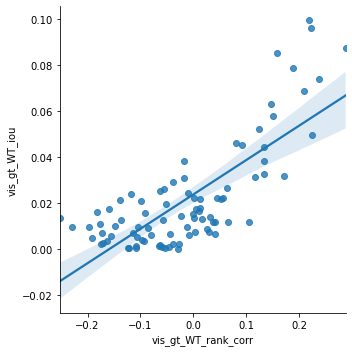

In [105]:
sns.lmplot('vis_gt_WT_rank_corr', 'vis_gt_WT_iou', hi)

In [109]:
un_df

,id,neg,target_cls,vis_name,layer_name,vltname,vlname,metric,vis_background_iou,vis_background_rank_corr,...,vis_gt_border_WT_rank_corr_pval,baseline_bkg_gt_border_WT_rank_corr,baseline_bkg_gt_border_WT_rank_corr_pval,vis_gt_WT_iou,baseline_0.0_gt_WT_iou,baseline_bkg_gt_WT_iou,vis_gt_WT_rank_corr,vis_gt_WT_rank_corr_pval,baseline_bkg_gt_WT_rank_corr,baseline_bkg_gt_WT_rank_corr_pval
0,BraTS20_Training_132,False,ET,ET GradCAM,l1 high res,ET GradCAM l1 high res,GradCAM l1 high res,iou,8.008710e-04,-0.707769,...,0.000000e+00,-0.151194,0.0,0.147918,1.293862e-10,7.680856e-12,0.314107,0.0,-0.231748,0.0
1,BraTS20_Training_132,False,ET,ET GradCAM,l1 low res,ET GradCAM l1 low res,GradCAM l1 low res,iou,9.031005e-02,0.077884,...,0.000000e+00,-0.151194,0.0,0.142584,1.293862e-10,7.680856e-12,0.277746,0.0,-0.231748,0.0
3,BraTS20_Training_132,False,ET,ET GradCAM,l1 final,ET GradCAM l1 final,GradCAM l1 final,iou,8.136936e-12,-0.089089,...,4.566318e-06,-0.151194,0.0,0.055655,1.293862e-10,7.680856e-12,0.374045,0.0,-0.231748,0.0
4,BraTS20_Training_132,False,ET,ET GradCAM,l2 high res,ET GradCAM l2 high res,GradCAM l2 high res,iou,9.996290e-03,-0.405036,...,0.000000e+00,-0.151194,0.0,0.161185,1.293862e-10,7.680856e-12,0.278568,0.0,-0.231748,0.0
5,BraTS20_Training_132,False,ET,ET GradCAM,l2 low res,ET GradCAM l2 low res,GradCAM l2 low res,iou,1.040332e-01,-0.274606,...,1.320569e-236,-0.151194,0.0,0.011460,1.293862e-10,7.680856e-12,-0.201623,0.0,-0.231748,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8441,BraTS20_Training_258,True,WT,WT Neg GradCAM,l3 low res,WT Neg GradCAM l3 low res,Neg GradCAM l3 low res,iou,2.253479e-02,0.001458,...,0.000000e+00,-0.113420,0.0,0.160552,1.823885e-10,7.815748e-12,0.239922,0.0,-0.194116,0.0
8443,BraTS20_Training_258,True,WT,WT Neg GradCAM,l3 final,WT Neg GradCAM l3 final,Neg GradCAM l3 final,iou,4.160198e-03,-0.083161,...,0.000000e+00,-0.113420,0.0,0.215196,1.823885e-10,7.815748e-12,0.393396,0.0,-0.194116,0.0
8444,BraTS20_Training_258,True,WT,WT Neg GradCAM,l4 high res,WT Neg GradCAM l4 high res,Neg GradCAM l4 high res,iou,1.457391e-01,0.190215,...,0.000000e+00,-0.113420,0.0,0.015592,1.823885e-10,7.815748e-12,-0.091676,0.0,-0.194116,0.0
8445,BraTS20_Training_258,True,WT,WT Neg GradCAM,l4 low res,WT Neg GradCAM l4 low res,Neg GradCAM l4 low res,iou,2.109701e-01,0.179828,...,0.000000e+00,-0.113420,0.0,0.036175,1.823885e-10,7.815748e-12,0.083755,0.0,-0.194116,0.0


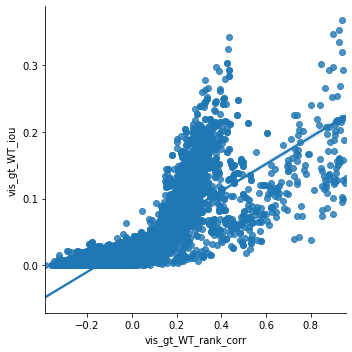

In [108]:
sns.lmplot('vis_gt_WT_rank_corr', 'vis_gt_WT_iou', un_df)

In [104]:
hi.columns

Index(['id', 'neg', 'target_cls', 'vis_name', 'layer_name', 'vltname',
       'vlname', 'metric', 'vis_background_iou', 'vis_background_rank_corr',
       'vis_background_rank_corr_pval', 'vis_gt_border_WT_iou',
       'baseline_0.0_gt_border_WT_iou', 'baseline_bkg_gt_border_WT_iou',
       'vis_gt_border_WT_rank_corr', 'vis_gt_border_WT_rank_corr_pval',
       'baseline_bkg_gt_border_WT_rank_corr',
       'baseline_bkg_gt_border_WT_rank_corr_pval', 'vis_gt_WT_iou',
       'baseline_0.0_gt_WT_iou', 'baseline_bkg_gt_WT_iou',
       'vis_gt_WT_rank_corr', 'vis_gt_WT_rank_corr_pval',
       'baseline_bkg_gt_WT_rank_corr', 'baseline_bkg_gt_WT_rank_corr_pval'],
      dtype='object')

In [138]:
hi = un_df[(un_df.vlname == 'Neg GradCAM l4 high res') & (un_df.target_cls == 'WT')]

In [181]:
metrics = [
    'vis_background_iou',
    'vis_background_rank_corr',
    'vis_background_rank_corr_pval',
    'vis_gt_border_WT_iou',
    'vis_gt_border_WT_rank_corr',
    'vis_gt_border_WT_rank_corr_pval',
    'vis_gt_WT_iou',
    'vis_gt_WT_rank_corr',
    'vis_gt_WT_rank_corr_pval',
]

In [182]:
xcol = 'pred_WT_iou'

In [176]:
ycol = 'vis_gt_WT_iou'

In [185]:
hi.shape

(88, 28)

# Does correctness make a difference?

### What the plot means: Without moving average

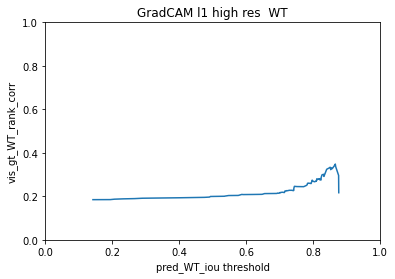

In [252]:
vlnames = [
    'GradCAM l1 high res', # because they don't highlight the background
    'GradCAM l2 high res',
    'GradCAM l3 high res',
    'GradCAM l4 high res',
    'Neg GradCAM l2 low res', # because they sort of look like ground truth border
    'Neg GradCAM l3 final',
    'GradCAM l1 final', # because it looks like ground truth
]

for vlname in vlnames[:1]:
    vis_df = un_df[(un_df.vlname == vlname) & (un_df.target_cls == 'WT')]

    #for ycol in metrics:
    for ycol in ['vis_gt_WT_rank_corr']:

        ts = sorted(vis_df[xcol])
        ys = []

        for t in ts:
            y = vis_df[ycol][(t <= vis_df[xcol])] #.mean()
            ys.append(y.mean())

        plt.figure()
        plt.title(f'{vlname}  WT')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.plot(ts, ys)
        plt.xlabel(f'{xcol} threshold')
        plt.ylabel(f'{ycol}')

### What the plot means: With moving average

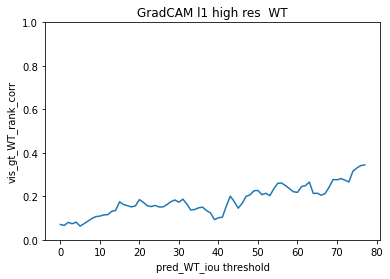

In [253]:
win_size = 10
vlnames = [
    'GradCAM l1 high res', # because they don't highlight the background
    'GradCAM l2 high res',
    'GradCAM l3 high res',
    'GradCAM l4 high res',
    'Neg GradCAM l2 low res', # because they sort of look like ground truth border
    'Neg GradCAM l3 final',
    'GradCAM l1 final', # because it looks like ground truth
]

for vlname in vlnames[:1]:
    vis_df = un_df[(un_df.vlname == vlname) & (un_df.target_cls == 'WT')]

    #for ycol in metrics:
    for ycol in ['vis_gt_WT_rank_corr']:

        ts = sorted(vis_df[xcol])
        ys = []

        for t_start, t_end in zip(ts[:-win_size], ts[win_size:]):
            #print(((t_start <= vis_df[xcol]) & (vis_df[xcol] < t_end)).shape)
            y = vis_df[ycol][(t_start <= vis_df[xcol]) & (vis_df[xcol] < t_end)] #.mean()
            #print(y)
            ys.append(y.mean())

        plt.figure()
        plt.title(f'{vlname}  WT')
        #plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.plot(ys)
        plt.xlabel(f'{xcol} threshold')
        plt.ylabel(f'{ycol}')

### Correctness and potential failure prediction performance

In [254]:
vlnames = [
    'GradCAM l1 high res', # because they don't highlight the background
    'GradCAM l2 high res',
    'GradCAM l3 high res',
    'GradCAM l4 high res',
    'Neg GradCAM l2 low res', # because they sort of look like ground truth border
    'Neg GradCAM l3 final',
    'GradCAM l1 final', # because it looks like ground truth
]

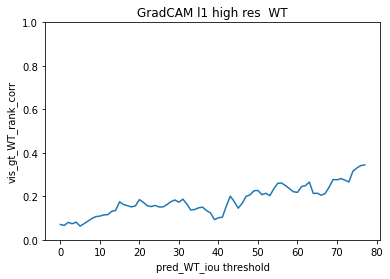

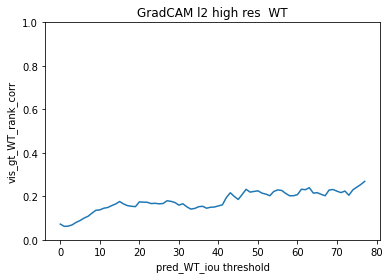

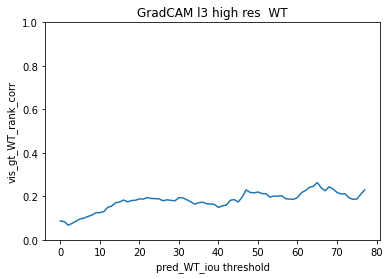

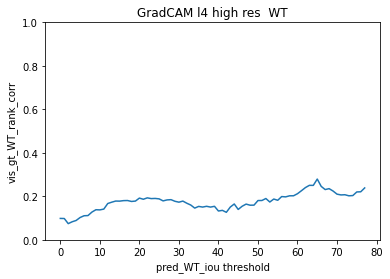

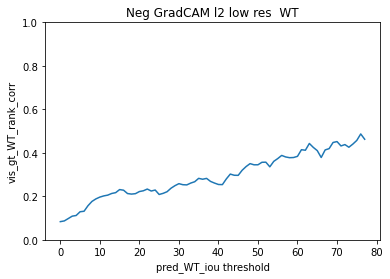

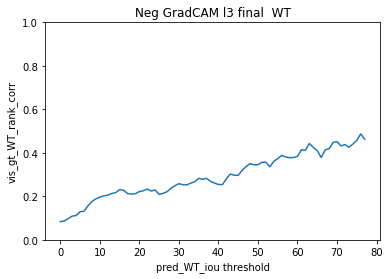

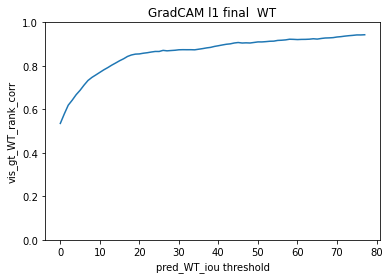

In [255]:
win_size = 10
for vlname in vlnames:
    vis_df = un_df[(un_df.vlname == vlname) & (un_df.target_cls == 'WT')]

    #for ycol in metrics:
    for ycol in ['vis_gt_WT_rank_corr']:

        ts = sorted(vis_df[xcol])
        ys = []

        for t_start, t_end in zip(ts[:-win_size], ts[win_size:]):
            #print(((t_start <= vis_df[xcol]) & (vis_df[xcol] < t_end)).shape)
            y = vis_df[ycol][(t_start <= vis_df[xcol]) & (vis_df[xcol] < t_end)] #.mean()
            #print(y)
            ys.append(y.mean())

        plt.figure()
        plt.title(f'{vlname}  WT')
        #plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.plot(ys)
        plt.xlabel(f'{xcol} threshold')
        plt.ylabel(f'{ycol}')

Assumptions:

1. the task is failure prediction
2. IF (higher overlap between vis and ground truth) THEN (more helpful for failure prediction)

Conclusion: The following 3 might help:
1. Neg GradCAM l2 low res
2. Neg GradCAM l3 final
3. GradCAM l1 final

### Are previous observations more strongly supported for correct models?

In [256]:
vlname_metrics = [
    ('GradCAM l1 high res', 'vis_background_rank_corr'), # because they don't highlight the background
    ('GradCAM l2 high res', 'vis_background_rank_corr'),
    ('GradCAM l3 high res', 'vis_background_rank_corr'),
    ('GradCAM l4 high res', 'vis_background_rank_corr'),
    ('Neg GradCAM l2 low res', 'vis_gt_border_WT_rank_corr'), # because they sort of look like ground truth border
    ('Neg GradCAM l3 final', 'vis_gt_border_WT_rank_corr'),
    ('GradCAM l1 final', 'vis_gt_WT_rank_corr'), # because it looks like ground truth
]

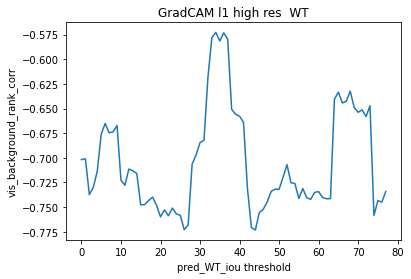

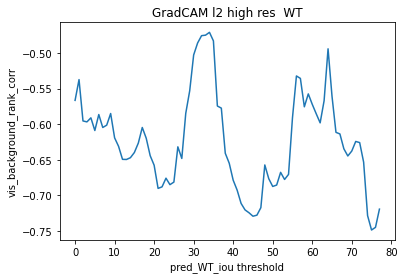

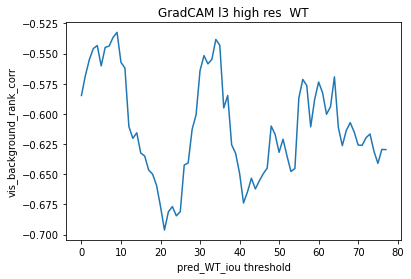

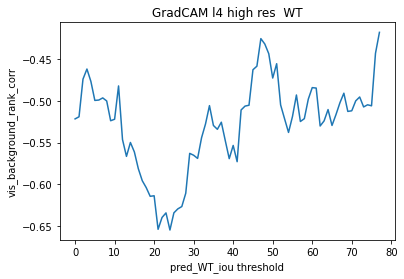

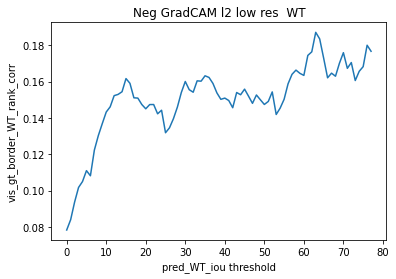

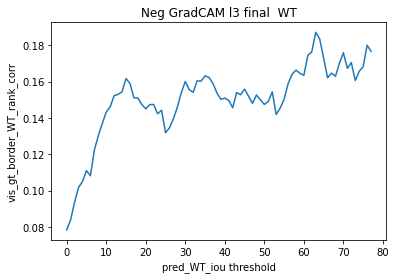

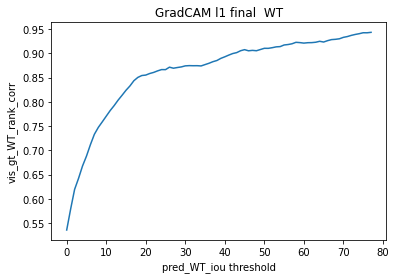

In [257]:
win_size = 10
for vlname, ycol in vlname_metrics:
    vis_df = un_df[(un_df.vlname == vlname) & (un_df.target_cls == 'WT')]

    ts = sorted(vis_df[xcol])
    ys = []

    for t_start, t_end in zip(ts[:-win_size], ts[win_size:]):
        #print(((t_start <= vis_df[xcol]) & (vis_df[xcol] < t_end)).shape)
        y = vis_df[ycol][(t_start <= vis_df[xcol]) & (vis_df[xcol] < t_end)] #.mean()
        #print(y)
        ys.append(y.mean())

    plt.figure()
    plt.title(f'{vlname}  WT')
    #plt.xlim([0, 1])
    #plt.ylim([0, 0.3])
    plt.plot(ys)
    plt.xlabel(f'{xcol} threshold')
    plt.ylabel(f'{ycol}')

# Extras

### For all visualizations

/dataSRI/MICHAELC/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


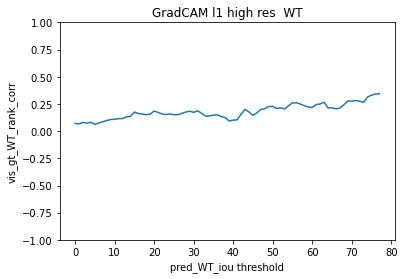

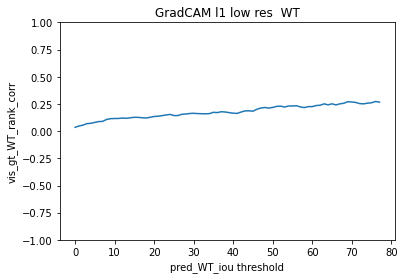

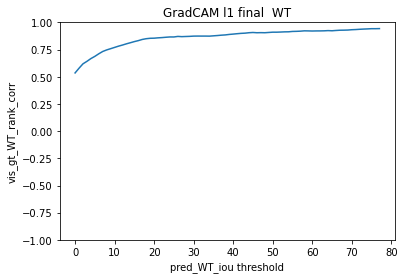

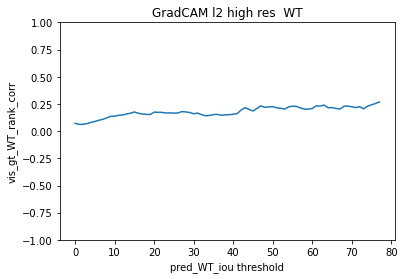

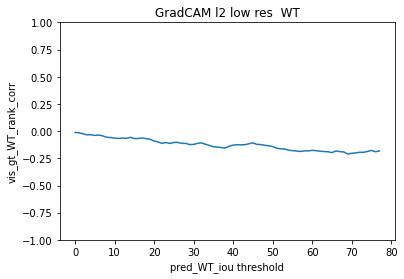

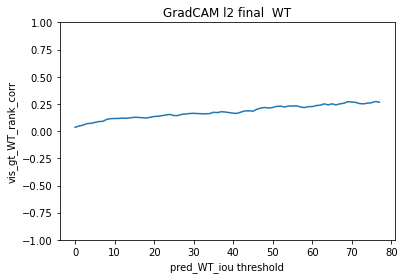

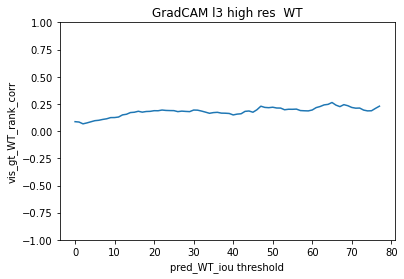

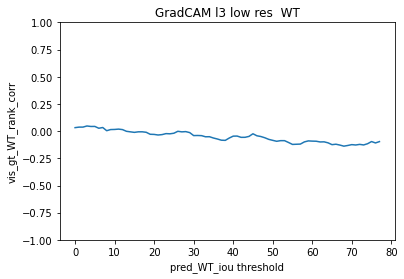

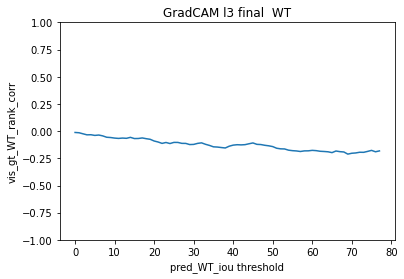

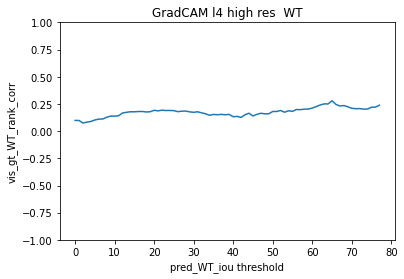

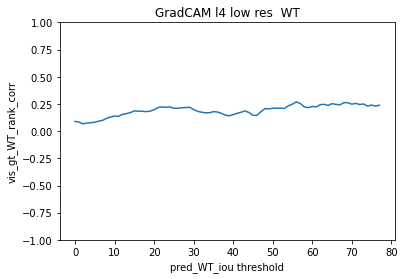

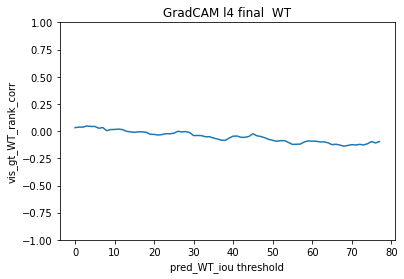

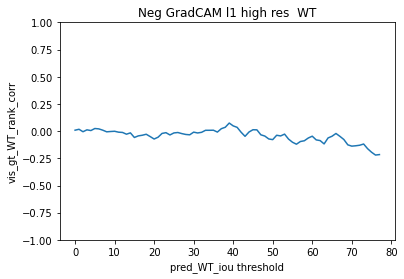

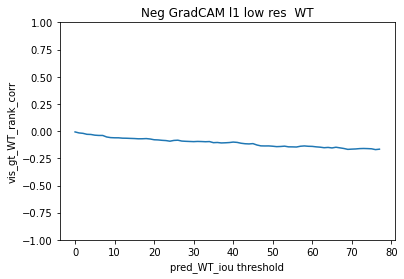

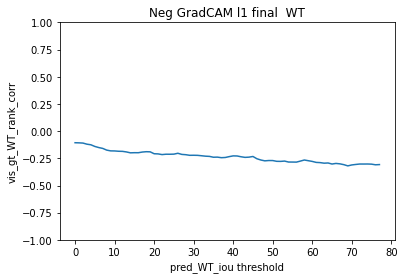

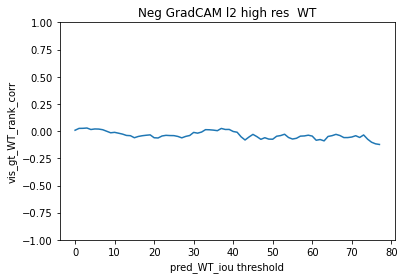

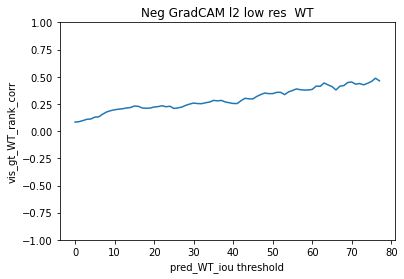

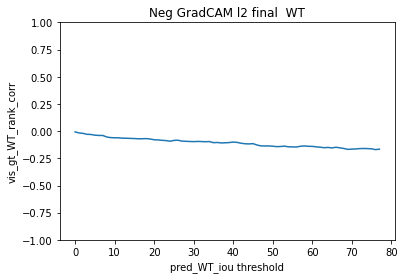

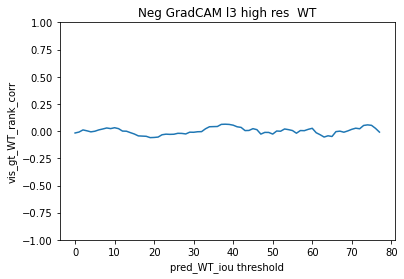

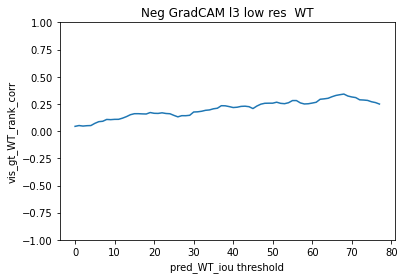

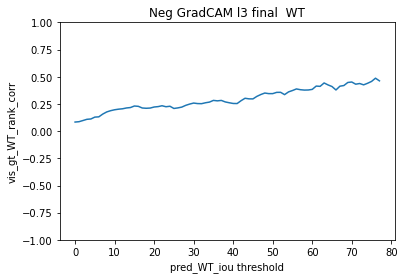

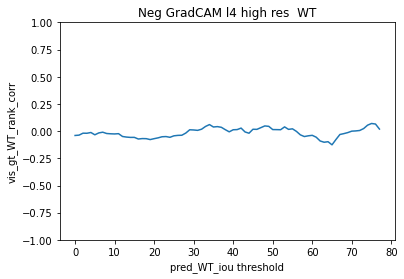

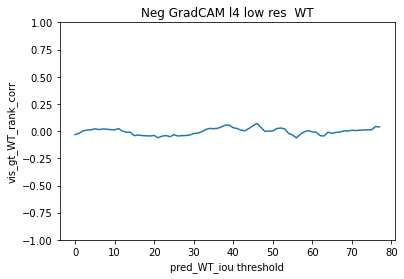

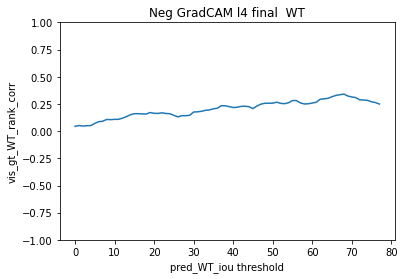

In [258]:
win_size = 10
vlnames = un_df.vlname.unique()
for vlname in vlnames:
    vis_df = un_df[(un_df.vlname == vlname) & (un_df.target_cls == 'WT')]

    #for ycol in metrics:
    for ycol in ['vis_gt_WT_rank_corr']:

        ts = sorted(vis_df[xcol])
        ys = []

        for t_start, t_end in zip(ts[:-win_size], ts[win_size:]):
            #print(((t_start <= vis_df[xcol]) & (vis_df[xcol] < t_end)).shape)
            y = vis_df[ycol][(t_start <= vis_df[xcol]) & (vis_df[xcol] < t_end)] #.mean()
            #print(y)
            ys.append(y.mean())

        plt.figure()
        plt.title(f'{vlname}  WT')
        #plt.xlim([0, 1])
        plt.ylim([-1, 1])
        plt.plot(ys)
        plt.xlabel(f'{xcol} threshold')
        plt.ylabel(f'{ycol}')

### All Metrics

In [259]:
vlnames = [
    'GradCAM l1 high res', # because they don't highlight the background
    'GradCAM l2 high res',
    'GradCAM l3 high res',
    'GradCAM l4 high res',
    'Neg GradCAM l2 low res', # because they sort of look like ground truth border
    'Neg GradCAM l3 final',
]
vlnames = [
    'GradCAM l1 final', # because it looks like ground truth
]

In [260]:
metrics = [
    'vis_background_iou',
    'vis_background_rank_corr',
    'vis_background_rank_corr_pval',
    'vis_gt_border_WT_iou',
    'vis_gt_border_WT_rank_corr',
    'vis_gt_border_WT_rank_corr_pval',
    'vis_gt_WT_iou',
    'vis_gt_WT_rank_corr',
    'vis_gt_WT_rank_corr_pval',
]

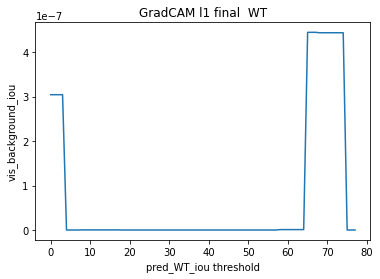

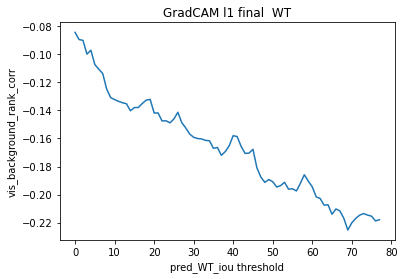

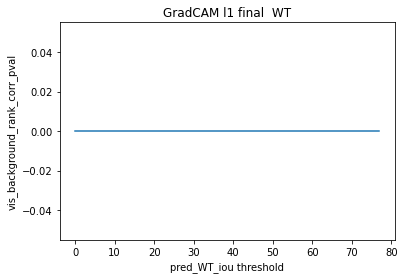

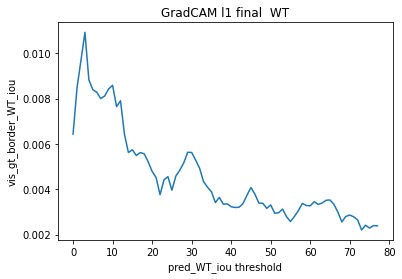

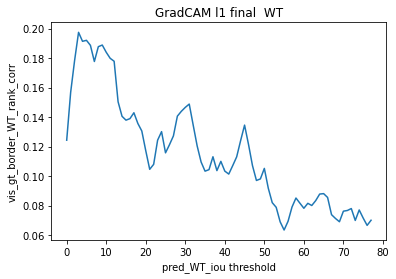

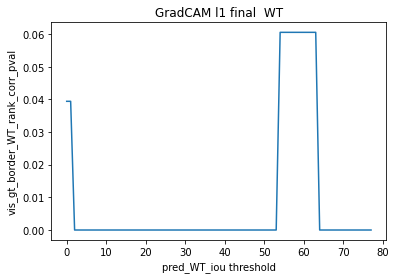

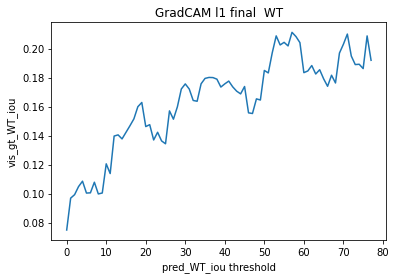

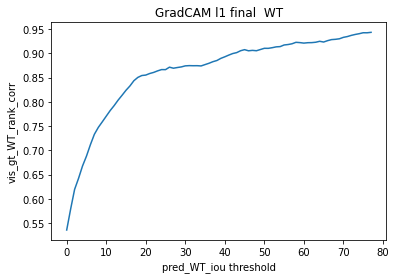

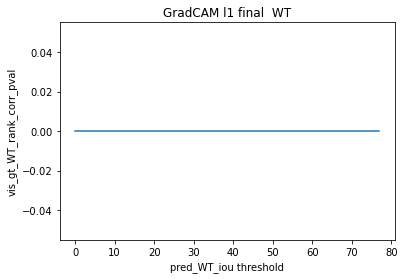

In [261]:
win_size = 10
for vlname in vlnames:
    vis_df = un_df[(un_df.vlname == vlname) & (un_df.target_cls == 'WT')]

    #for ycol in metrics:
    for ycol in metrics:

        ts = sorted(vis_df[xcol])
        ys = []

        for t_start, t_end in zip(ts[:-win_size], ts[win_size:]):
            #print(((t_start <= vis_df[xcol]) & (vis_df[xcol] < t_end)).shape)
            y = vis_df[ycol][(t_start <= vis_df[xcol]) & (vis_df[xcol] < t_end)] #.mean()
            #print(y)
            ys.append(y.mean())

        plt.figure()
        plt.title(f'{vlname}  WT')
        #plt.xlim([0, 1])
        #plt.ylim([0, 0.3])
        plt.plot(ys)
        plt.xlabel(f'{xcol} threshold')
        plt.ylabel(f'{ycol}')

# Comparison to the same model at epoch 20

In [110]:
import eval
import layers_list

afile = 'data/models/unet_resize2/f full_vis_comparison_with_rankcorr_try2/analysis.pkl'
with open(afile, 'rb') as f:
    analysis = pkl.load(f)

In [111]:
unet_layers = dict(layers_list.unet_layers)
vis_keys = list(eval.vis_key_name_mapping.keys())
layer_keys = list(unet_layers.keys())
all_keys = [(vis_key, layer_key) for vis_key in vis_keys
                                 for layer_key in layer_keys]

In [169]:
examples = []
for ex in analysis['examples']:
    vis_key = ex['vis_key']
    layer_key = ex['layer_key']
    vis_name = eval.vis_key_name_mapping[vis_key]                                
    layer_name = unet_layers[layer_key]
    if 'vis_background_iou' not in ex:
        ex['vis_background_iou'] = None
    if 'vis_background_corr' not in ex:
        ex['vis_background_corr'] = None
    vis_entry = {
        'id': ex['id'],
        'neg': 'Neg' in vis_name,
        'target_cls': vis_key_to_cls[vis_key],
        'vis_name': vis_name,
        'layer_name': layer_name,
        'vltname': vis_name + ' ' + layer_name,
    }
    vis_entry['vlname'] = (vis_name + ' ' + layer_name).replace(vis_entry['target_cls'] + ' ', '')

    
    
    iou_entry = dict(vis_entry)
    examples.append(iou_entry)
    iou_entry['metric'] = 'iou'
    if ex.get('vis_gt_iou') is not None:
        iou_entry['vis_background_iou'] = ex['vis_background_iou'][0, 0, 0]
        iou_entry['vis_background_rank_corr'] = ex['vis_background_corr'][0, 0, 0, 0]
        iou_entry['vis_background_rank_corr_pval'] = ex['vis_background_corr'][0, 0, 1, 0]

        # border iou
        iou_entry['vis_gt_border_WT_iou'] = ex['vis_gt_border_iou'][0, 2, 0]
        iou_entry['baseline_0.0_gt_border_WT_iou'] = ex['vis_gt_border_iou'][0, 2, 1]
        iou_entry['baseline_bkg_gt_border_WT_iou'] = ex['vis_gt_border_iou'][0, 2, 4]
        
        # border rank corr
        iou_entry['vis_gt_border_WT_rank_corr'] = ex['vis_gt_border_corr'][0, 2, 0, 0]
        iou_entry['vis_gt_border_WT_rank_corr_pval'] = ex['vis_gt_border_corr'][0, 2, 1, 0]
        iou_entry['baseline_bkg_gt_border_WT_rank_corr'] = ex['vis_gt_border_corr'][0, 2, 0, 1]
        iou_entry['baseline_bkg_gt_border_WT_rank_corr_pval'] = ex['vis_gt_border_corr'][0, 2, 1, 1]

        # gt iou
        iou_entry['vis_gt_WT_iou'] = ex['vis_gt_iou'][0, 2, 0]
        iou_entry['baseline_0.0_gt_WT_iou'] = ex['vis_gt_iou'][0, 2, 1]
        iou_entry['baseline_bkg_gt_WT_iou'] = ex['vis_gt_iou'][0, 2, 4]

        # gt rank corr
        iou_entry['vis_gt_WT_rank_corr'] = ex['vis_gt_corr'][0, 2, 0, 0]
        iou_entry['vis_gt_WT_rank_corr_pval'] = ex['vis_gt_corr'][0, 2, 1, 0]
        iou_entry['baseline_bkg_gt_WT_rank_corr'] = ex['vis_gt_corr'][0, 2, 0, 1]
        iou_entry['baseline_bkg_gt_WT_rank_corr_pval'] = ex['vis_gt_corr'][0, 2, 1, 1]

        # model's segmentation performance
        iou_entry['pred_ET_iou'] = ex['pred_iou'][0, 0, 0]
        iou_entry['pred_TC_iou'] = ex['pred_iou'][0, 1, 0]
        iou_entry['pred_WT_iou'] = ex['pred_iou'][0, 2, 0]


    #         'vis_TC': ex['vis_gt_iou'][0, 1] if ex['vis_gt_iou'] is not None else None,
    #         'vis_WT': ex['vis_gt_iou'][0, 2] if ex['vis_gt_iou'] is not None else None,
    #         'vis_l1': ex['vis_gt_iou'][0, 3] if ex['vis_gt_iou'] is not None else None,
    #         'vis_l2': ex['vis_gt_iou'][0, 4] if ex['vis_gt_iou'] is not None else None,
    #         'vis_border_ET': ex['vis_gt_border_iou'][0, 0] if ex['vis_gt_border_iou'] is not None else None,
    #         'vis_border_TC': ex['vis_gt_border_iou'][0, 1] if ex['vis_gt_border_iou'] is not None else None,
    #         'vis_border_WT': ex['vis_gt_border_iou'][0, 2] if ex['vis_gt_border_iou'] is not None else None,
    #         'vis_border_l1': ex['vis_gt_border_iou'][0, 3] if ex['vis_gt_border_iou'] is not None else None,
    #         'vis_border_l2': ex['vis_gt_border_iou'][0, 4] if ex['vis_gt_border_iou'] is not None else None,
    #         'vis_background': ex['vis_background_iou'] if ex['vis_background_iou'] is not None else None,
    #         'pred_ET': ex['pred_iou'][0, 0],
    #         'pred_TC': ex['pred_iou'][0, 1],
    #         'pred_WT': ex['pred_iou'][0, 2],
    #     })
    #     examples.append({
    #         'id': ex['id'],
    #         'neg': 'Neg' in vis_name,
    #         'target_cls': vis_key_to_cls[vis_key],
    #         'vis_name': vis_name,
    #         'layer_name': layer_name,
    #         'vlname': vis_name + ' ' + layer_name,
    #         'metric': 'corr',
    #         'vis_ET': ex['vis_gt_corr'][0, 0] if ex['vis_gt_corr'] is not None else None,
    #         'vis_TC': ex['vis_gt_corr'][0, 1] if ex['vis_gt_corr'] is not None else None,
    #         'vis_WT': ex['vis_gt_corr'][0, 2] if ex['vis_gt_corr'] is not None else None,
    #         'vis_l1': ex['vis_gt_corr'][0, 3] if ex['vis_gt_corr'] is not None else None,
    #         'vis_l2': ex['vis_gt_corr'][0, 4] if ex['vis_gt_corr'] is not None else None,
    #         'vis_border_ET': ex['vis_gt_border_corr'][0, 0, 0] if ex['vis_gt_border_corr'] is not None else None,
    #         'vis_border_TC': ex['vis_gt_border_corr'][0, 1, 0] if ex['vis_gt_border_corr'] is not None else None,
    #         'vis_border_WT': ex['vis_gt_border_corr'][0, 2, 0] if ex['vis_gt_border_corr'] is not None else None,
    #         'vis_border_l1': ex['vis_gt_border_corr'][0, 3, 0] if ex['vis_gt_border_corr'] is not None else None,
    #         'vis_border_l2': ex['vis_gt_border_corr'][0, 4, 0] if ex['vis_gt_border_corr'] is not None else None,
    #         'vis_background': ex['vis_background_corr'] if ex['vis_background_corr'] is not None else None,
    #         'pred_ET': ex['pred_corr'][0, 0],
    #         'pred_TC': ex['pred_corr'][0, 1],
    #         'pred_WT': ex['pred_corr'][0, 2],
    #     })

df = pd.DataFrame(examples)

df = df[np.logical_not(df.layer_name.str.contains('[high,low]', regex=False))]
un_df = df
#df = df[df.target_cls == 'WT']
